#Importing Libraries

In [ ]:
import os
import pandas as pd
import cv2
import tensorflow.keras as keras
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential


#4.2 Loading Data

In [ ]:
#4.2Loading Data
import os
import pandas as pd

csv_files = [
    'GT-00000.csv', 'GT-00001.csv', 'GT-00002.csv', 'GT-00003.csv', 'GT-00004.csv',
    'GT-00005.csv', 'GT-00006.csv', 'GT-00007.csv', 'GT-00008.csv', 'GT-00009.csv',
    'GT-00010.csv', 'GT-00011.csv', 'GT-00012.csv', 'GT-00013.csv', 'GT-00014.csv',
    'GT-00015.csv', 'GT-00016.csv', 'GT-00017.csv', 'GT-00018.csv', 'GT-00019.csv',
    'GT-00020.csv', 'GT-00021.csv', 'GT-00022.csv', 'GT-00023.csv', 'GT-00024.csv',
    'GT-00025.csv', 'GT-00026.csv', 'GT-00027.csv', 'GT-00028.csv', 'GT-00029.csv',
    'GT-00030.csv', 'GT-00031.csv', 'GT-00032.csv', 'GT-00033.csv', 'GT-00034.csv',
    'GT-00035.csv', 'GT-00036.csv', 'GT-00037.csv', 'GT-00038.csv', 'GT-00039.csv',
    'GT-00040.csv', 'GT-00041.csv', 'GT-00042.csv'
]

for csv_file in csv_files:
    df = pd.read_csv(csv_file, sep=';')

    # Print some information about the CSV file
    print(f"\nProcessing CSV file: {csv_file}")
    print(f"Number of rows: {len(df)}")
    print(f"Columns: {df.columns}")

    # Optional: Print the first few rows of the dataframe
    print("\nFirst few rows of the dataframe:")
    print(df.head())



Processing CSV file: GT-00000.csv
Number of rows: 150
Columns: Index(['Filename', 'Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2',
       'ClassId'],
      dtype='object')

First few rows of the dataframe:
          Filename  Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId
0  00000_00000.ppm     29      30       5       6      24      25        0
1  00000_00001.ppm     30      30       5       5      25      25        0
2  00000_00002.ppm     30      30       5       5      25      25        0
3  00000_00003.ppm     31      31       5       5      26      26        0
4  00000_00004.ppm     30      32       5       6      25      26        0

Processing CSV file: GT-00001.csv
Number of rows: 1500
Columns: Index(['Filename', 'Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2',
       'ClassId'],
      dtype='object')

First few rows of the dataframe:
          Filename  Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId
0  00000_00000.ppm     56      57       

In [ ]:
import os
import pandas as pd
import numpy as np
from tensorflow import keras

list_images = []
output = []

csv_files = [
    'GT-00000.csv', 'GT-00001.csv', 'GT-00002.csv', 'GT-00003.csv', 'GT-00004.csv',
    'GT-00005.csv', 'GT-00006.csv', 'GT-00007.csv', 'GT-00008.csv', 'GT-00009.csv',
    'GT-00010.csv', 'GT-00011.csv', 'GT-00012.csv', 'GT-00013.csv', 'GT-00014.csv',
    'GT-00015.csv', 'GT-00016.csv', 'GT-00017.csv', 'GT-00018.csv', 'GT-00019.csv',
    'GT-00020.csv', 'GT-00021.csv', 'GT-00022.csv', 'GT-00023.csv', 'GT-00024.csv',
    'GT-00025.csv', 'GT-00026.csv', 'GT-00027.csv', 'GT-00028.csv', 'GT-00029.csv',
    'GT-00030.csv', 'GT-00031.csv', 'GT-00032.csv', 'GT-00033.csv', 'GT-00034.csv',
    'GT-00035.csv', 'GT-00036.csv', 'GT-00037.csv', 'GT-00038.csv', 'GT-00039.csv',
    'GT-00040.csv', 'GT-00041.csv', 'GT-00042.csv'
]

for csv_file in csv_files:
    csv_data = pd.read_csv( csv_file, sep=';')

    for _, row in csv_data.iterrows():
        output.append(row['ClassId'])

train_y = keras.utils.to_categorical(output)

# The rest of your existing code remains unchanged
randomize = np.arange(len(train_y))
np.random.shuffle(randomize)

y = train_y[randomize]

# Split data into training, validation, and test sets
split_size = int(len(train_y) * 0.6)
train_y, val_y = y[:split_size], y[split_size:]

split_size = int(len(val_y) * 0.5)
val_y, test_y = val_y[:split_size], val_y[split_size:]


#4.3 Resizing Data

The interpolation argument in the resize function specifies the method used to estimate pixel values when resizing an image. When you resize an image, you are essentially changing the number of pixels, and interpolation helps in determining the color values of the new pixels based on the existing ones. There are different interpolation methods available, and the choice of method affects the quality and characteristics of the resized image.

Common interpolation methods include:

Nearest-neighbor interpolation (cv2.INTER_NEAREST): It assigns the value of the nearest pixel to the new pixel. This method is fast but may result in a blocky appearance.

Bilinear interpolation (cv2.INTER_LINEAR): It considers the closest 2x2 neighborhood of known pixel values, performs a linear interpolation, and assigns the result to the new pixel. This method produces smoother results compared to nearest-neighbor interpolation.

Bicubic interpolation (cv2.INTER_CUBIC): It takes a 4x4 neighborhood into account and uses cubic polynomials for interpolation. Bicubic interpolation generally provides higher quality but is computationally more expensive.

Area-based interpolation (cv2.INTER_AREA): It resamples pixel values using pixel area relation. This method is suitable for downscaling, and it tends to produce smoother results for reduction, but it may not be as accurate for upscaling.![40537_2021_444_Fig13_HTML.png](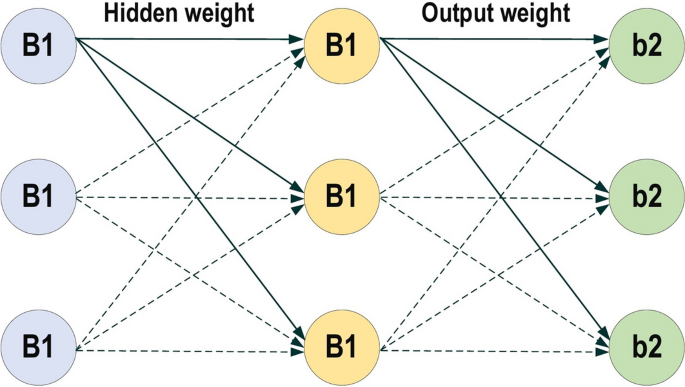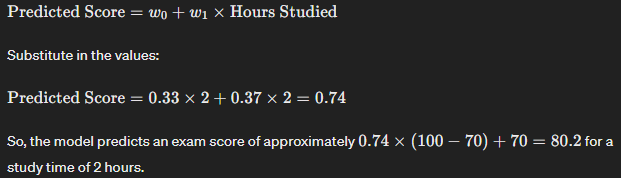)

#4.4Shuffling and Splitting Data


Splitting data into training, validation, and test sets serves several purposes:

Training Set:

Purpose: The training set is used to train the model. During training, the model learns patterns and relationships in the data, adjusting its parameters to minimize the difference between predicted and actual values.
Number of Images: It typically contains the majority of the dataset, allowing the model to learn from a diverse range of examples.
Validation Set:

Purpose: The validation set is used to fine-tune the model and optimize hyperparameters. It provides an independent dataset that the model hasn't seen during training, helping to detect and prevent overfitting.
Number of Images: It is smaller than the training set and is used for model evaluation during training. The size depends on the size of the overall dataset, but common splits are around 10-20% of the data.
Test Set:

Purpose: The test set is reserved for the final evaluation of the model's performance after training is complete. It helps assess how well the model generalizes to new, unseen data.
Number of Images: Similar to the validation set, it is kept independent from the training process and is typically around 10-20% of the total dataset.
Shuffling:

Purpose: Shuffling the data prior to splitting helps in randomizing the order of examples. This is crucial to prevent any bias that might arise if the data is ordered in a specific way (e.g., all images of one class grouped together).
Avoiding Bias: Shuffling ensures that each subset (training, validation, test) has a representative distribution of classes and patterns. It helps the model generalize well to diverse data by preventing it from learning specific patterns based on the order of examples in the dataset.
In summary, splitting data and shuffling are essential practices to ensure effective training, evaluation, and generalization of machine learning models. The specific number of images in each set depends on the size of the dataset and the desired balance between training and evaluation.

#4.5Model Details

#1)  What is a convolutional layer?

A convolutional layer is a fundamental building block in a Convolutional Neural Network (CNN). It is designed to efficiently recognize patterns and spatial hierarchies in input data, especially when dealing with grid-like data such as images. The convolutional layer performs a mathematical operation called convolution.

Here are the key concepts related to convolutional layers:

Convolution Operation:

Purpose: The convolution operation involves sliding a small filter (also called a kernel) over the input data, performing element-wise multiplication between the filter and the input at each position, and summing up the results. This process allows the network to learn local patterns and features.
Learnable Filters: The filters are learnable parameters of the network. During training, the network adjusts these filters to recognize important patterns such as edges, textures, or more complex features.
Filters and Feature Maps:

Filters: Filters are small, learnable matrices that capture specific features in the input data. For example, a filter might detect diagonal edges or color gradients.
Feature Maps: The output of the convolution operation is a feature map. Each filter in the convolutional layer produces a separate feature map. These feature maps collectively represent the presence of various features in the input.
Local Receptive Fields:

Local Connectivity: Convolutional layers enforce local connectivity, meaning that each neuron in the layer is connected to only a local region of the input (receptive field). This allows the network to focus on small, spatially proximate features.
Pooling Layers:

Pooling: Convolutional layers are often followed by pooling layers. Pooling reduces the spatial dimensions of the input and the computational load by downsampling the feature maps. Common pooling operations include max pooling, which takes the maximum value from a local region.
Strides:

Stride: Stride refers to the step size with which the filter moves across the input during the convolution operation. A larger stride reduces the spatial dimensions of the output.
Convolutional layers are crucial for image recognition tasks as they enable the model to automatically learn hierarchical representations of visual features, capturing both low-level details and high-level patterns in the data. The shared weights and local connectivity make convolutional layers computationally efficient and effective for image-related tasks in deep learning.

# 2. In the provided code, what do each of the arguments passed to Conv2D do?


In the provided code, the Conv2D layers are used to create convolutional layers in a Convolutional Neural Network (CNN). Let's break down each argument passed to the Conv2D layers:

Conv2D(16, (3, 3), activation='relu', input_shape=(64,64,3), padding='same'),

16: This represents the number of filters (or kernels) in the convolutional layer. In this case, the layer has 16 filters, and each filter learns different features from the input data.

(3, 3): This is the size of each filter. In this case, each filter has a size of 3x3. The filter size determines the receptive field and the spatial extent of features that the filter can recognize.

activation='relu': This specifies the activation function used after the convolution operation. In this case, Rectified Linear Unit (ReLU) activation is used. ReLU introduces non-linearity to the model and is commonly used in CNNs.

input_shape=(64,64,3): This parameter is specific to the first convolutional layer and defines the shape of the input data. In this case, the input shape is (64, 64, 3), indicating a 3-channel image with dimensions 64x64 pixels.

padding='same': This argument determines the padding strategy. 'Same' padding means that the spatial dimensions of the output feature map are the same as the input. It pads the input as necessary to achieve this.

The subsequent Conv2D layers follow a similar pattern with variations in the number of filters and the size of the filters. MaxPooling2D layers are also used to reduce the spatial dimensions of the feature maps.

The Flatten() layer is used to flatten the output from the convolutional layers into a 1D array before passing it through dense layers. Finally, dense layers with different units and activation functions are used to perform classification.

The model.compile line configures the model for training, specifying the loss function, optimizer, and metrics. The model is then trained using the fit method with the specified training data (train_x and train1_y) and validation data (val_x and val_y).

# 3. What is maxpooling?

MaxPooling is a down-sampling operation commonly used in Convolutional Neural Networks (CNNs) to reduce the spatial dimensions of the input volume (or feature map) and decrease the computational complexity of the network.

The MaxPooling operation involves taking the maximum value from a group of neighboring pixels in a specified region (typically a 2x2 or 3x3 window) and using that maximum value as the representative value for that region in the down-sampled feature map. The window then moves over the input volume with a certain stride, and the process is repeated.

# 4. What is a dense layer? How is it different from a convolutional layer?


A Dense layer (fully connected layer) and a Convolutional layer are two fundamental types of layers used in neural networks, and they serve different purposes in the architecture.

Dense Layer:

Purpose: A Dense layer is used for learning global patterns and relationships in the input data. Every node in a Dense layer is connected to every node from the previous layer.
Operation: Each node in a Dense layer receives input from all the nodes in the preceding layer and contributes to the output of every node in the following layer.
Parameters: Dense layers have a large number of parameters, especially when used in deep networks, which can lead to a high computational load.
Convolutional Layer:

Purpose: A Convolutional layer is designed for learning local patterns and features in the input data. It is particularly effective for image data and spatial relationships.
Operation: Convolutional layers use small filters (kernels) that slide over the input data, capturing local patterns and creating feature maps. The connectivity is local, and each neuron is connected to a small region of the input.
Parameters: Convolutional layers have fewer parameters compared to Dense layers because the weights are shared across different spatial locations.
Differences:

Local vs. Global Patterns: Convolutional layers focus on local patterns and spatial hierarchies, making them well-suited for image-related tasks. Dense layers, on the other hand, capture global patterns across the entire input.
Parameter Sharing: Convolutional layers use parameter sharing through the use of kernels, which helps in learning translation-invariant features. Dense layers have independent parameters for each connection.
Spatial Dimensions: Convolutional layers maintain the spatial dimensions of the input (height and width), whereas Dense layers result in a flattened output, losing spatial information.

#5. What is an epoch?

An epoch, in the context of training a neural network, refers to one complete pass through the entire training dataset during the training phase. In other words, an epoch is a single iteration in which the entire dataset is forward-propagated through the neural network, the corresponding predictions are compared to the actual target values using a loss function, and then the network's weights are updated through backpropagation to minimize the loss.

#6. Which loss function do we use in this problem? Explain why this loss function is appropriate for the problem we are solving.

The loss function used in the code is 'categorical_crossentropy'. This choice is appropriate for multi-class classification problems, where each input can belong to one of several classes (in this case, 43 classes, as indicated by the last dense layer with 43 units and softmax activation).

Explanation:

Categorical Crossentropy:

Crossentropy is a measure of the difference between two probability distributions. In the context of classification problems, it quantifies how well the predicted probabilities match the true distribution of the classes.
Categorical crossentropy is specifically designed for multi-class classification problems where each input belongs to exactly one class.
The model's output is a probability distribution over all classes for each input, and categorical crossentropy penalizes the model based on the divergence between this predicted distribution and the true distribution (one-hot encoded labels).
Softmax Activation:

The final layer of the neural network uses a softmax activation function. Softmax converts the raw output scores of the network into probabilities, ensuring that they sum to 1. This is crucial for interpreting the output as a probability distribution over the different classes.
Categorical crossentropy complements softmax by providing a suitable loss measure for comparing the predicted probabilities with the true distribution.
In summary, for multi-class classification problems like this traffic sign classification task, the combination of softmax activation in the output layer and categorical crossentropy as the loss function is a standard and effective choice to guide the training process towards producing accurate class probabilities.

# 7. Create a diagram of the neural network model

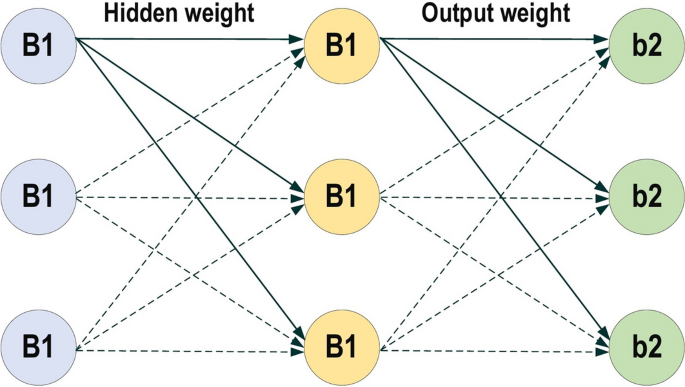

#4.6Performance

model.evaluate(test_x, test_y)

Loss: This value will represent the categorical crossentropy loss on the test set. It quantifies how well the model's predictions match the true labels. A lower loss indicates better performance.

Accuracy: This value will represent the accuracy of the model on the test set. It reflects the proportion of correctly classified samples. A higher accuracy indicates better performance.

#4.7 Improving the models

# 1 One way we can improve our performance is to provide the model with more...

In [ ]:
import matplotlib.pyplot as plt

# Initialize variables to store results
num_images_list = [20, 30, 40, 50, 60, 70, 80, 90, 100]
accuracy_results = []

for num_images in num_images_list:
    list_images = []
    output = []

    for dir in os.listdir(data_dir):
        i = 0
        if dir == '.DS_Store':
            continue
        inner_dir = os.path.join(data_dir, dir)
        csv_file = pd.read_csv(os.path.join(inner_dir, "GT-" + dir + '.csv'), sep=';')
        for row in csv_file.iterrows():
            if i < num_images:
                img_path = os.path.join(inner_dir, row[1].Filename)
                img = cv2.imread(img_path)
                img = img[row[1]['Roi.X1']:row[1]['Roi.X2'], row[1]['Roi.Y1']:row[1]['Roi.Y2'], :]
                img = preprocess(img)
                list_images.append(img)
                output.append(row[1].ClassId)
            i += 1

    input_array = np.stack(list_images)
    train_y = keras.utils.to_categorical(output)

    randomize = np.arange(len(input_array))
    np.random.shuffle(randomize)

    x = input_array[randomize]
    y = train_y[randomize]

    split_size = int(x.shape[0] * 0.6)
    train_x, val_x = x[:split_size], x[split_size:]
    train1_y, val_y = y[:split_size], y[split_size:]

    split_size = int(val_x.shape[0] * 0.5)
    val_x, test_x = val_x[:split_size], val_x[split_size:]
    val_y, test_y = val_y[:split_size], val_y[split_size:]



    # Evaluate the model and store accuracy
    _, accuracy = model.evaluate(test_x, test_y)
    accuracy_results.append(accuracy)

# Plotting the results
plt.plot(num_images_list, accuracy_results, marker='o')
plt.xlabel('Number of Images per Class')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Images per Class')
plt.show()


This code will loop through different numbers of images per class, train the model, and record the accuracy. Finally, it plots the accuracy against the number of images per class.







#2. Another way to improve a model is to use dropout. What is dropout?

Dropout is a regularization technique commonly used in neural networks to prevent overfitting. It involves randomly setting a fraction of input units to zero during each update of the training phase. This "dropping out" of randomly selected neurons helps prevent the model from relying too heavily on specific neurons or features, making it more robust and reducing overfitting.

Dropout Explanation:

Dropout is a regularization technique used in neural networks to prevent overfitting. During training, randomly selected neurons are "dropped out," meaning they are ignored or "dropped" with a certain probability. This helps prevent co-adaptation of neurons and encourages the network to learn more robust features.

Implementation in Keras:

In Keras, the Dropout layer can be added to the model to incorporate dropout. The argument passed to Dropout represents the fraction of input units to drop during training. For example, Dropout(0.2) means that 20% of the input units will be randomly dropped out during each update.

Modified Code with Dropout:

Here's how you can modify your existing code to include dropout after each max-pooling layer and after all but the last dense layer:

In [ ]:
from keras.layers import Dropout

epochs = 10
batch_size = 16

input_shape = Input(shape=(32, 32,3))

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(64,64,3), padding='same'),
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),  # Add dropout after the first max-pooling layer

    Conv2D(32, (3, 3), activation='relu', padding='same'),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),  # Add dropout after the second max-pooling layer

    Conv2D(64, (3, 3), activation='relu', padding='same'),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),  # Add dropout after the third max-pooling layer

    Flatten(),
    Dense(units=2048, activation='relu'),
    Dropout(0.2),  # Add dropout after the first dense layer

    Dense(units=1024, activation='relu'),
    Dropout(0.2),  # Add dropout after the second dense layer

    Dense(units=128, activation='relu'),
    Dense(units=43, input_dim=2048, activation='softmax'),
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])
trained_model_conv = model.fit(train_x.reshape(-1,64,64,3), train1_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

Batch Normalization Explanation:

Batch Normalization is a technique used to improve the training stability and performance of neural networks. It normalizes the input of each layer across a mini-batch by subtracting the mini-batch mean and dividing by the mini-batch standard deviation. This helps mitigate the internal covariate shift problem and allows for more stable and faster training.

Implementation in Keras:

In Keras, the BatchNormalization layer can be added after each convolutional layer to implement batch normalization.

# 3. We can further improve the model is by including batch normalization. What is batch normalization?

In [ ]:
from keras.layers import BatchNormalization


model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(64,64,3), padding='same'),
    BatchNormalization(),  # Add batch normalization after the first convolutional layer

    Conv2D(16, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),  # Add batch normalization after the second convolutional layer

    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),  # Add batch normalization after the third convolutional layer

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),  # Add batch normalization after the fourth convolutional layer

    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),  # Add batch normalization after the fifth convolutional layer

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),  # Add batch normalization after the sixth convolutional layer

    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(units=2048, activation='relu'),
    BatchNormalization(),  # Add batch normalization after the first dense layer

    Dense(units=1024, activation='relu'),
    BatchNormalization(),  # Add batch normalization after the second dense layer

    Dense(units=128, activation='relu'),
    Dense(units=43, input_dim=2048, activation='softmax'),
])



Results and Interpretation:

Batch normalization can help improve the training stability and convergence of the model. It provides normalization to the inputs, making the optimization process more robust